Задание:
1) Выберите набор данных (датасет) для решения задачи классификации или регресии.
2) В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3) С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4) Обучите 1) одну из линейных моделей, 2) SVM и 3) дерево решений.
Оцените качество моделей с помощью трех подходящих для задачи метрик. Сравните качество полученных моделей.
5) Произведите для каждой модели подбор одного гиперпараметра с использованием GridSearchCV и кросс-валидации.
6) Повторите пункт 4 для найденных оптимальных значений гиперпараметров.
Сравните качество полученных моделей с качеством моделей, полученных в пункте 4.

In [1]:
import numpy as np #библиотека для работы с многомерными массивами данных и математическими операциями над ними
import pandas as pd #библиотека для анализа и обработки данных
from scipy import stats
from sklearn.datasets import load_iris #берём датасет
import matplotlib.pyplot as plt #простое рисование графиков
import seaborn as sns #удобные дефолтные настройки графиков из matpotlib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import *
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression # для линейной модели
from sklearn.svm import SVR # для SVM модели
from sklearn.tree import DecisionTreeRegressor # для дерева решений

%matplotlib inline
#для сохранения в ноутбуке вывода моих графиков

In [2]:
df = load_iris()
df = pd.DataFrame(data = np.c_[df['data'], df['target']], columns = df['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


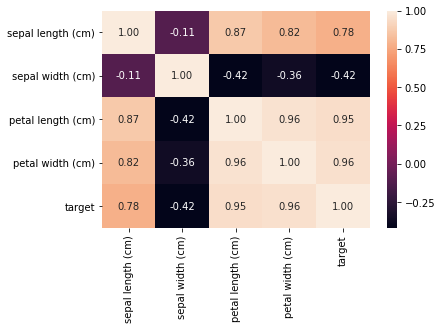

In [3]:
#Построим корреляционную матрицу
sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.2f')

In [4]:
df.loc[:, df.columns!='target'] = df.loc[:, df.columns!='target'].apply(lambda x: x/x.max(), axis=0)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df.loc[:, df.columns!='target'], 
                                                    df['target'], 
                                                    test_size= 0.33)

# Линейная регрессия (метод наименьших квадратов)

In [6]:
lr = LinearRegression().fit(x_train, y_train)

In [11]:
print(mean_absolute_error(lr.predict(x_test), y_test))
# средняя абсолютная ошибка
print(r2_score(lr.predict(x_test), y_test))
# коэффициент детерминации y_test от x_test
print(median_absolute_error(lr.predict(x_test), y_test))
# медианная абсолютная ошибка

0.15813403408236723
0.9293926260991913
0.12039089576427153


# SVM (метод опорных векторов) поиск разделяющей плоскости

In [12]:
svr = SVR().fit(x_train, y_train)

In [13]:
print(mean_absolute_error(svr.predict(x_test), y_test))
print(r2_score(svr.predict(x_test), y_test))
print(median_absolute_error(svr.predict(x_test), y_test))

0.1475517589614622
0.9288728357920244
0.09142280206530484


# Decision Tree

In [14]:
dt = DecisionTreeRegressor(max_depth=2).fit(x_train, y_train)

In [15]:
print(mean_absolute_error(dt.predict(x_test), y_test))
print(r2_score(dt.predict(x_test), y_test))
print(median_absolute_error(dt.predict(x_test), y_test))

0.07555555555555557
0.9351992078285182
0.0


# GridSearch

In [16]:
lr = GridSearchCV(LinearRegression(), {'n_jobs':range(1,10)}, cv=3).fit(x_train, y_train).best_estimator_
# лучшее кол-во джобов=1

In [17]:
print(mean_absolute_error(lr.predict(x_test), y_test))
print(r2_score(lr.predict(x_test), y_test))
print(median_absolute_error(lr.predict(x_test), y_test))

0.15813403408236723
0.9293926260991913
0.12039089576427153


In [18]:
svr = GridSearchCV(SVR(), {'degree':range(1,10)}, cv=3).fit(x_train, y_train).best_estimator_
# лучшая степень=1

In [19]:
print(mean_absolute_error(svr.predict(x_test), y_test))
print(r2_score(svr.predict(x_test), y_test))
print(median_absolute_error(svr.predict(x_test), y_test))

0.1475517589614622
0.9288728357920244
0.09142280206530484


In [20]:
dt = GridSearchCV(DecisionTreeRegressor(), {'max_depth':range(1,10)}, cv=3).fit(x_train, y_train).best_estimator_
# лучшая глубина=3

In [21]:
print(mean_absolute_error(dt.predict(x_test), y_test))
print(r2_score(dt.predict(x_test), y_test))
print(median_absolute_error(dt.predict(x_test), y_test))

0.04
0.9410377358490566
0.0
